In [1]:
print("sairam")

sairam


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Download the plain text dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWT1OXX/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWT1OXX/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWT1OXX/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
train, test = imdb['train'], imdb['test']

In [6]:
training_sentences = []
training_labels    = []

for s, l in train:
  training_sentences.append(s.numpy().decode("utf-8"))
  training_labels.append(l.numpy())

print(f"Len of tr sen {len(training_sentences)}")
print(f"Len of tr lab {len(training_labels)}")
print(training_sentences[0:1])

test_sentences = []
test_labels    = []

for s, l in test:
  test_sentences.append(s.numpy().decode("utf-8"))
  test_labels.append(l.numpy())

print(f"Len of te sen {len(test_sentences)}")
print(f"Len of te lab {len(test_labels)}")
print(test_sentences[0:1])

Len of tr sen 25000
Len of tr lab 25000
["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."]
Len of te sen 25000
Len of te lab 25000
["There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-L

In [7]:
tokenizer = Tokenizer(oov_token="<OOV>", num_words=10000)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

print(len(word_index))

88583


In [ ]:
word_index

In [ ]:
train_seq = tokenizer.texts_to_sequences(training_sentences)
test_seq  = tokenizer.texts_to_sequences(test_sentences)

train_padded_seq = pad_sequences(train_seq, padding="post", maxlen=120, truncating="post")
test_padded_seq = pad_sequences(test_seq, padding="post", maxlen=120, truncating="post")

print(train_padded_seq[0:5])

In [13]:
training_labels_final = np.array(training_labels)
test_labels_final     = np.array(test_labels)

In [16]:
print(train_padded_seq.shape, training_labels_final.shape)
print(test_padded_seq.shape, test_labels_final.shape)

(25000, 120) (25000,)
(25000, 120) (25000,)


Model 1: Flatten

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, "relu"),
    tf.keras.layers.Dense(1, "sigmoid")
])

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                61472     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 221,505
Trainable params: 221,505
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(train_padded_seq, training_labels_final, validation_data=(test_padded_seq, test_labels_final), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
196/196 - 3s - loss: 0.5624 - accuracy: 0.6894 - val_loss: 0.3945 - val_accuracy: 0.8189 - 3s/epoch - 14ms/step
Epoch 2/10
196/196 - 2s - loss: 0.2717 - accuracy: 0.8908 - val_loss: 0.3909 - val_accuracy: 0.8241 - 2s/epoch - 9ms/step
Epoch 3/10
196/196 - 3s - loss: 0.1254 - accuracy: 0.9622 - val_loss: 0.4703 - val_accuracy: 0.8080 - 3s/epoch - 13ms/step
Epoch 4/10
196/196 - 2s - loss: 0.0383 - accuracy: 0.9946 - val_loss: 0.5516 - val_accuracy: 0.8081 - 2s/epoch - 9ms/step
Epoch 5/10
196/196 - 2s - loss: 0.0119 - accuracy: 0.9992 - val_loss: 0.6183 - val_accuracy: 0.8064 - 2s/epoch - 8ms/step
Epoch 6/10
196/196 - 2s - loss: 0.0049 - accuracy: 0.9999 - val_loss: 0.6664 - val_accuracy: 0.8067 - 2s/epoch - 10ms/step
Epoch 7/10
196/196 - 2s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.7089 - val_accuracy: 0.8062 - 2s/epoch - 8ms/step
Epoch 8/10
196/196 - 2s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7352 - val_accuracy: 0.8079 - 2s/epoch - 8ms/step
Epoch 9/10
196/196 - 

In [23]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

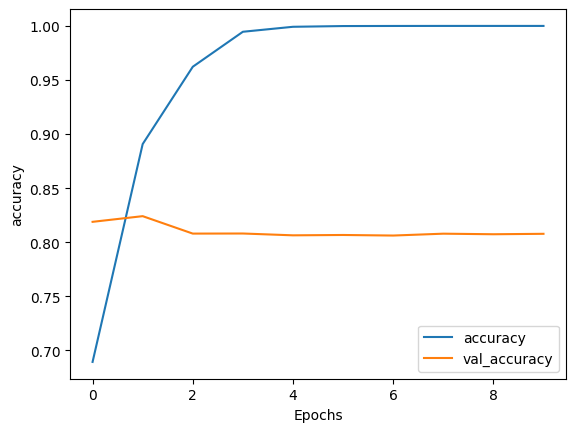

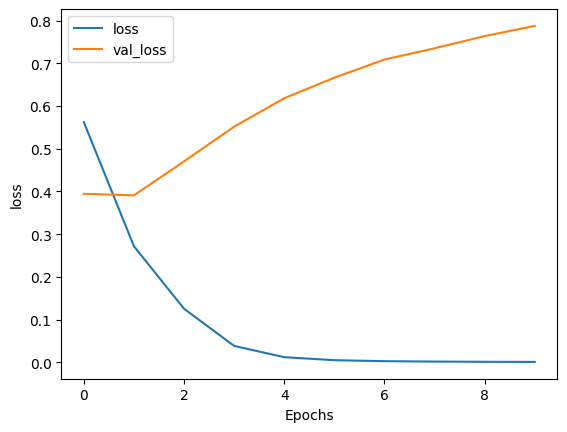

In [25]:
# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

LSTM

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(16, "relu"),
    tf.keras.layers.Dense(1, "sigmoid")
])

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              41472     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 203,553
Trainable params: 203,553
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_lstm = model.fit(train_padded_seq, training_labels_final, validation_data=(test_padded_seq, test_labels_final), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
196/196 - 86s - loss: 0.5353 - accuracy: 0.7015 - val_loss: 0.3937 - val_accuracy: 0.8251 - 86s/epoch - 436ms/step
Epoch 2/10
196/196 - 101s - loss: 0.3042 - accuracy: 0.8758 - val_loss: 0.4064 - val_accuracy: 0.8158 - 101s/epoch - 513ms/step
Epoch 3/10
196/196 - 83s - loss: 0.2422 - accuracy: 0.9065 - val_loss: 0.4525 - val_accuracy: 0.8166 - 83s/epoch - 425ms/step
Epoch 4/10
196/196 - 81s - loss: 0.2109 - accuracy: 0.9225 - val_loss: 0.4336 - val_accuracy: 0.8088 - 81s/epoch - 413ms/step
Epoch 5/10
196/196 - 80s - loss: 0.1841 - accuracy: 0.9332 - val_loss: 0.4887 - val_accuracy: 0.8088 - 80s/epoch - 410ms/step
Epoch 6/10
196/196 - 79s - loss: 0.1584 - accuracy: 0.9455 - val_loss: 0.5029 - val_accuracy: 0.8039 - 79s/epoch - 404ms/step
Epoch 7/10
196/196 - 79s - loss: 0.1330 - accuracy: 0.9551 - val_loss: 0.6369 - val_accuracy: 0.7946 - 79s/epoch - 402ms/step
Epoch 8/10
196/196 - 80s - loss: 0.1154 - accuracy: 0.9619 - val_loss: 0.6616 - val_accuracy: 0.7943 - 80s/epoch - 4

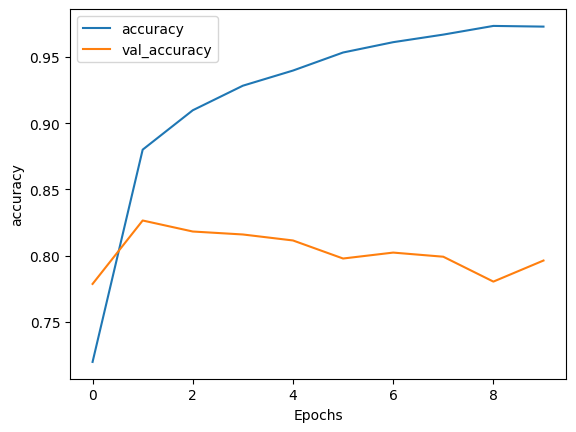

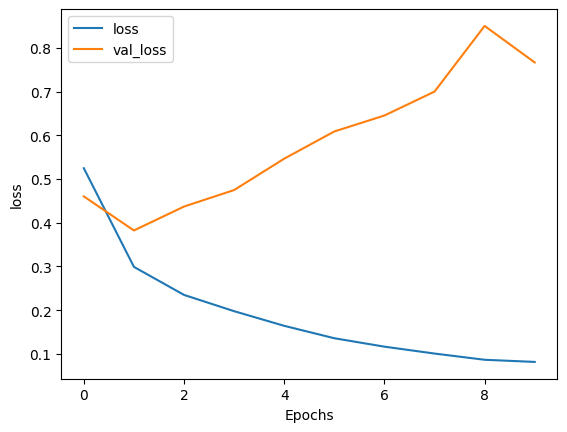

In [28]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

GRU
The Gated Recurrent Unit or GRU is usually referred to as a simpler version of the LSTM. It can be used in applications where the sequence is important but you want faster results and can sacrifice some accuracy. You will notice in the model summary that it is a bit smaller than the LSTM and it also trains faster by a few seconds.

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(16, "relu"),
    tf.keras.layers.Dense(1, "sigmoid")
])

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              31488     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 16)                2064      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 193,569
Trainable params: 193,569
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_gru = model.fit(train_padded_seq, training_labels_final, validation_data=(test_padded_seq, test_labels_final), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
196/196 - 80s - loss: 0.5385 - accuracy: 0.7020 - val_loss: 0.4045 - val_accuracy: 0.8149 - 80s/epoch - 409ms/step
Epoch 2/10
196/196 - 79s - loss: 0.3060 - accuracy: 0.8746 - val_loss: 0.3904 - val_accuracy: 0.8247 - 79s/epoch - 403ms/step
Epoch 3/10
196/196 - 78s - loss: 0.2465 - accuracy: 0.9070 - val_loss: 0.5004 - val_accuracy: 0.8154 - 78s/epoch - 399ms/step
Epoch 4/10
196/196 - 77s - loss: 0.2080 - accuracy: 0.9224 - val_loss: 0.4935 - val_accuracy: 0.8022 - 77s/epoch - 394ms/step
Epoch 5/10
196/196 - 78s - loss: 0.1772 - accuracy: 0.9385 - val_loss: 0.5150 - val_accuracy: 0.8088 - 78s/epoch - 399ms/step
Epoch 6/10
196/196 - 79s - loss: 0.1500 - accuracy: 0.9483 - val_loss: 0.5604 - val_accuracy: 0.8064 - 79s/epoch - 402ms/step
Epoch 7/10
196/196 - 80s - loss: 0.1226 - accuracy: 0.9590 - val_loss: 0.7126 - val_accuracy: 0.7938 - 80s/epoch - 407ms/step
Epoch 8/10
196/196 - 79s - loss: 0.0890 - accuracy: 0.9717 - val_loss: 0.7833 - val_accuracy: 0.7960 - 79s/epoch - 405

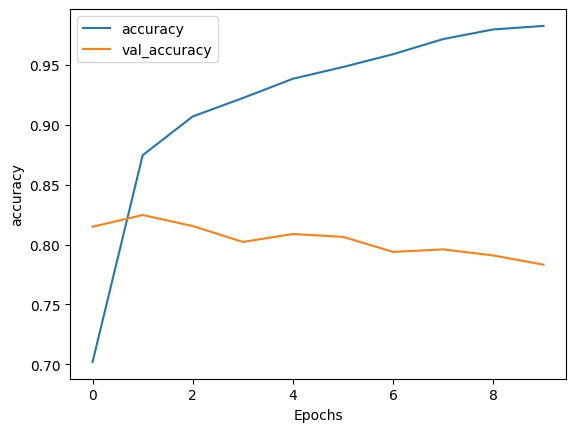

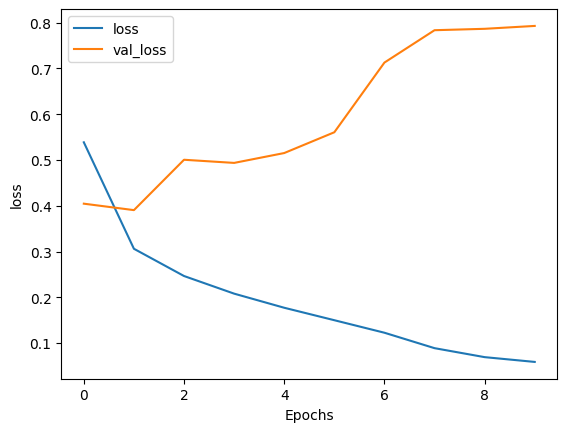

In [33]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

Convolution

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=120),
    tf.keras.layers.Conv1D(128, 5, activation="relu"),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, "relu"),
    tf.keras.layers.Dense(1, "sigmoid")
])

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_10 (Dense)            (None, 16)                2064      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 172,449
Trainable params: 172,449
Non-trainable params: 0
________________________________________________

In [35]:
history_conv = model.fit(train_padded_seq, training_labels_final, validation_data=(test_padded_seq, test_labels_final), epochs=10, batch_size=128, verbose=2)

Epoch 1/10
196/196 - 11s - loss: 0.5143 - accuracy: 0.7426 - val_loss: 0.3844 - val_accuracy: 0.8276 - 11s/epoch - 54ms/step
Epoch 2/10
196/196 - 11s - loss: 0.2935 - accuracy: 0.8793 - val_loss: 0.3896 - val_accuracy: 0.8281 - 11s/epoch - 54ms/step
Epoch 3/10
196/196 - 10s - loss: 0.2389 - accuracy: 0.9062 - val_loss: 0.4197 - val_accuracy: 0.8234 - 10s/epoch - 49ms/step
Epoch 4/10
196/196 - 9s - loss: 0.2010 - accuracy: 0.9240 - val_loss: 0.4590 - val_accuracy: 0.8188 - 9s/epoch - 44ms/step
Epoch 5/10
196/196 - 10s - loss: 0.1725 - accuracy: 0.9380 - val_loss: 0.5017 - val_accuracy: 0.8161 - 10s/epoch - 49ms/step
Epoch 6/10
196/196 - 9s - loss: 0.1511 - accuracy: 0.9462 - val_loss: 0.5622 - val_accuracy: 0.8065 - 9s/epoch - 47ms/step
Epoch 7/10
196/196 - 12s - loss: 0.1302 - accuracy: 0.9556 - val_loss: 0.6186 - val_accuracy: 0.8031 - 12s/epoch - 59ms/step
Epoch 8/10
196/196 - 12s - loss: 0.1148 - accuracy: 0.9626 - val_loss: 0.6714 - val_accuracy: 0.7977 - 12s/epoch - 59ms/step
Epoc

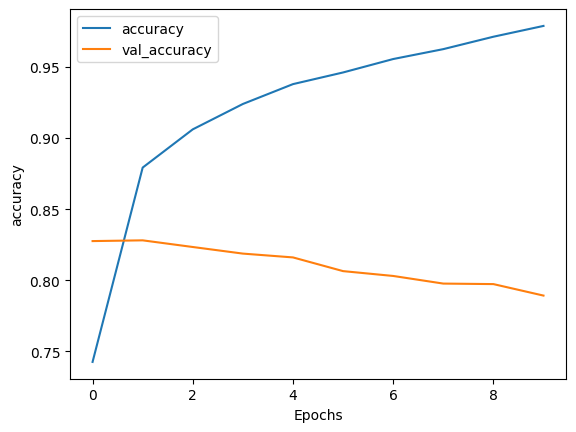

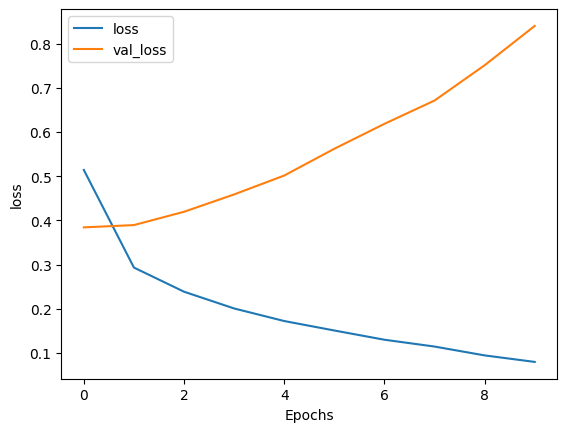

In [36]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')